In [328]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [330]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")
df.head(6)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
5,5,Mexico,North America,56.446.821,452524,781.054,72.27


## Data Cleaning

In [332]:
df['Production (Tons)'] = df['Production (Tons)'].str.replace(".","")
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace(".","").str.replace(",",".")
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace(".","")
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace(".","").str.replace(",",".")

In [333]:
df.head(10)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879
5,5,Mexico,North America,56446821,452524,781054,7227
6,6,Colombia,South America,36951213,740075,416626,88691.5
7,7,Australia,Oceania,34403004,1373.406,447204,76929.1
8,8,Guatemala,North America,33533403,1938.114,25985,129049.3
9,9,United States of America,North America,29926210,91304,37053,80766


In [334]:
df.rename(columns = {"Production (Tons)":"Production(Tons)"} , inplace = True)
df.rename(columns = {"Production per Person (Kg)":"Production_per_Person(Kg)"}, inplace = True)
df.rename(columns = {"Acreage (Hectare)":"Acreage(Hectare)"} , inplace = True)
df.rename(columns = {"Yield (Kg / Hectare)":"Yield(Kg/Hectare)"} , inplace = True)
df.head(5)

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [335]:
df = df.drop("Unnamed: 0" , axis = 1)
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [336]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [337]:
df['Production(Tons)'] = df['Production(Tons)'].astype(float)
df['Production_per_Person(Kg)'] = df['Production_per_Person(Kg)'].astype(float)
df['Acreage(Hectare)'] = df['Acreage(Hectare)'].astype(float)
df['Yield(Kg/Hectare)'] = df['Yield(Kg/Hectare)'].astype(float)

In [338]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [339]:
df.isnull().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [340]:
df[df['Acreage(Hectare)'].isnull()]

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53.0,51.0,NaN,NaN


In [341]:
df.dropna().reset_index().drop("index", axis = 1)

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...,...,...
97,Spain,Europe,394.0,8.000,9.0,43596.5
98,Lebanon,Asia,97.0,16.000,3.0,28386.4
99,Singapore,Asia,50.0,9.000,2.0,25.0
100,Samoa,Oceania,12.0,6.000,1.0,11949.8


## Univariate Analysis

In [343]:
df.head(5)

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [344]:
df.nunique()

Country                      103
Continent                      6
Production(Tons)             103
Production_per_Person(Kg)    102
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

### How many countries produce sugarcane from each continent?

In [346]:
df['Continent'].value_counts()

Continent
Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

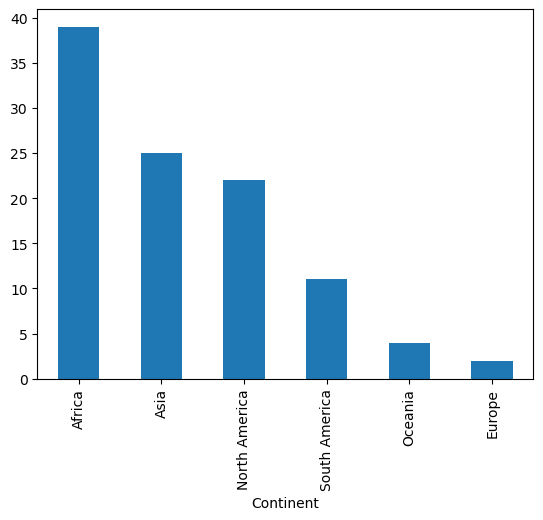

In [347]:
df['Continent'].value_counts().plot( kind = 'bar')

### Checking outliers

<Axes: >

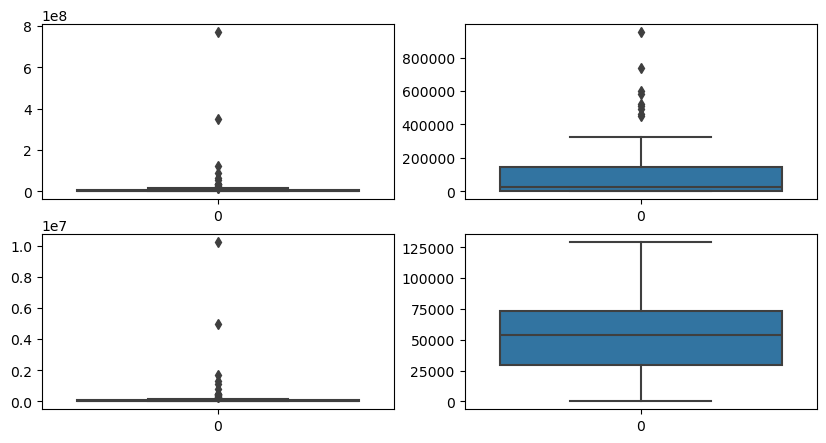

In [349]:
plt.figure( figsize = (10,5))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])

plt.subplot(2,2,2)
sns.boxplot(df['Production_per_Person(Kg)'])

plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])

plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])

### Distribution of the columns

C:\Users\ShyamKumar\AppData\Local\Temp\ipykernel_11360\2094049851.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])
C:\Users\ShyamKumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ShyamKumar\AppData\Local\Temp\ipykernel_11360\2094049851.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

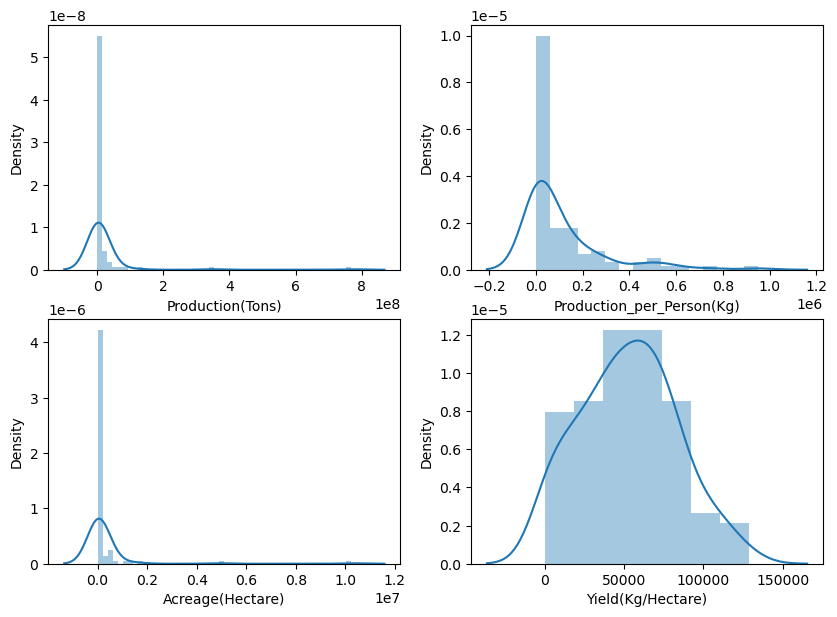

In [351]:
plt.figure( figsize = (10,7))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])

plt.subplot(2,2,2)
sns.distplot(df['Production_per_Person(Kg)'])

plt.subplot(2,2,3)
sns.distplot(df['Acreage(Hectare)'])

plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg/Hectare)'])

<Axes: >

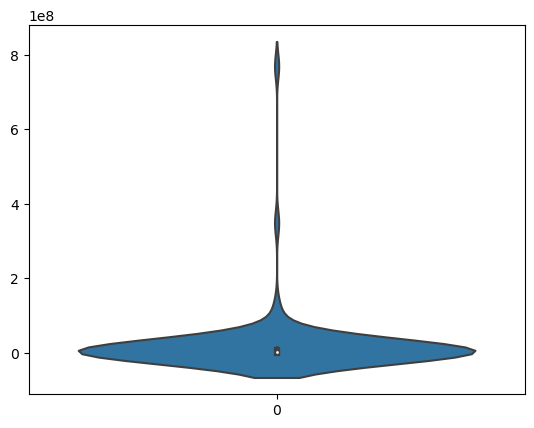

In [352]:
sns.violinplot( data = df['Production(Tons)'])

## Bivariate Analysis

In [369]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### Which country produces maximum sugarcane?


In [372]:
df_new = df[['Country', 'Production(Tons)']].set_index('Country')

In [373]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Lebanon,97.0
Djibouti,53.0
Singapore,50.0


In [374]:
df_new['Production_percent'] = df_new['Production(Tons)'] *100/df_new['Production(Tons)'].sum()

In [375]:
df_new

,Production(Tons),Production_percent
Country,,
Brazil,768678382.0,4.072728e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Lebanon,97.0,5.139401e-06
Djibouti,53.0,2.808126e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production_percent'>

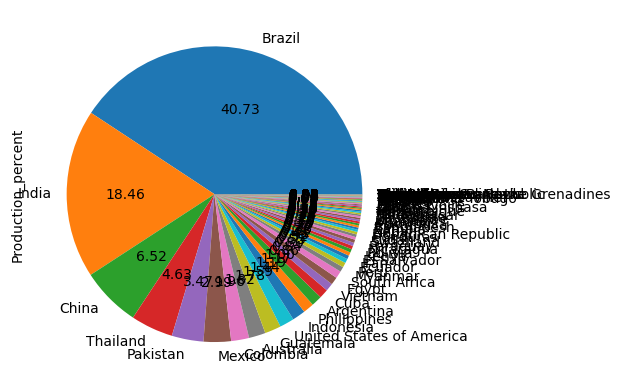

In [376]:
df_new['Production_percent'].plot( kind = 'pie' , autopct = "%.2f")

<Axes: xlabel='Country'>

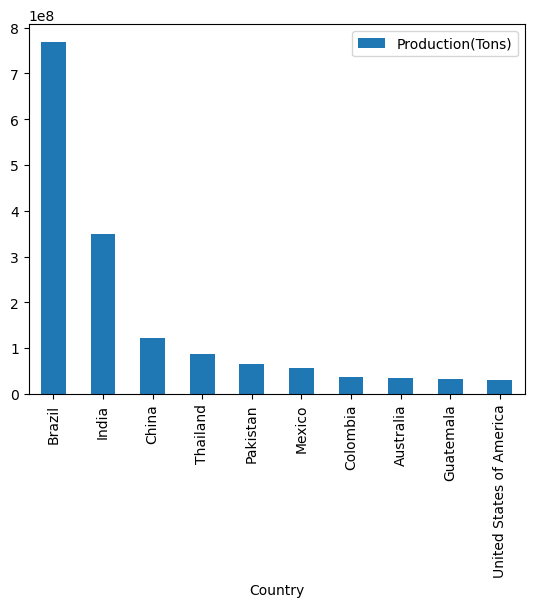

In [379]:
df[["Country","Production(Tons)"]].set_index('Country').sort_values('Production(Tons)', ascending = False).head(10).plot( kind = 'bar')

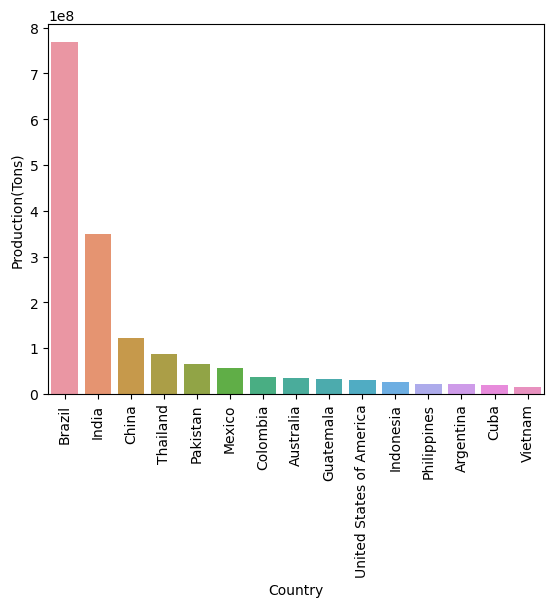

In [380]:
ax = sns.barplot(data = df.head(15), x = 'Country' , y = 'Production(Tons)')
ax.set_xticklabels(ax.get_xticklabels() , rotation = 90 )
plt.show()

### Which country has highest land?


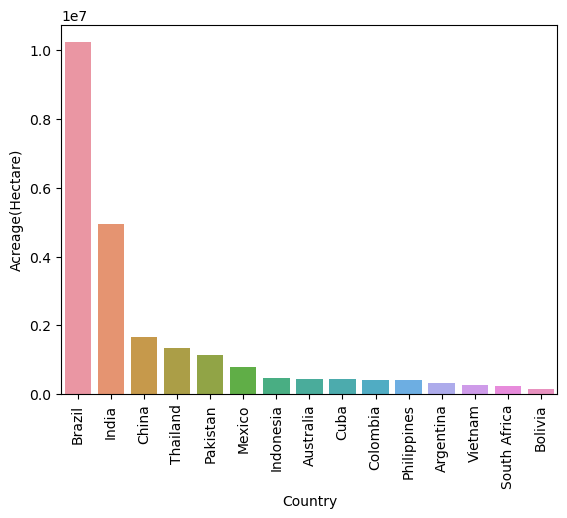

In [383]:
ax_ac = df.sort_values("Acreage(Hectare)",ascending = False ).head(15)
ax = sns.barplot(data = ax_ac, x = 'Country' , y = 'Acreage(Hectare)')
ax.set_xticklabels(ax.get_xticklabels() , rotation = 90 )
plt.show()

### Which country has highest yield per hectare?


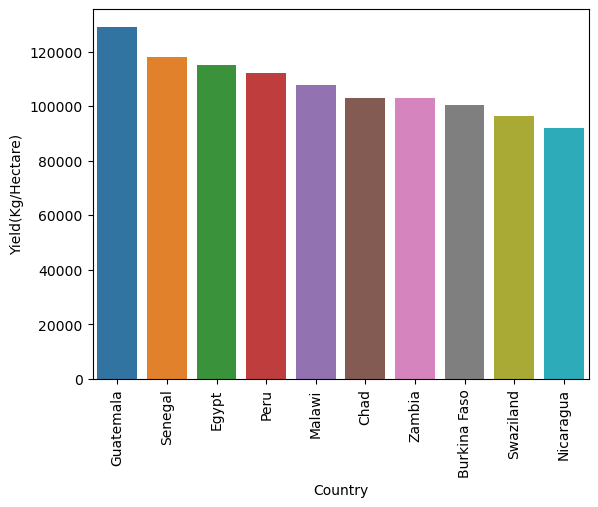

In [385]:
ax_hc = df.sort_values('Yield(Kg/Hectare)', ascending = False).head(10)
ax = sns.barplot( data = ax_hc , x = 'Country' , y = 'Yield(Kg/Hectare)')
ax.set_xticklabels( ax.get_xticklabels(), rotation  = 90)
plt.show()

### Which country has highest production?


In [391]:
df.head(5)

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


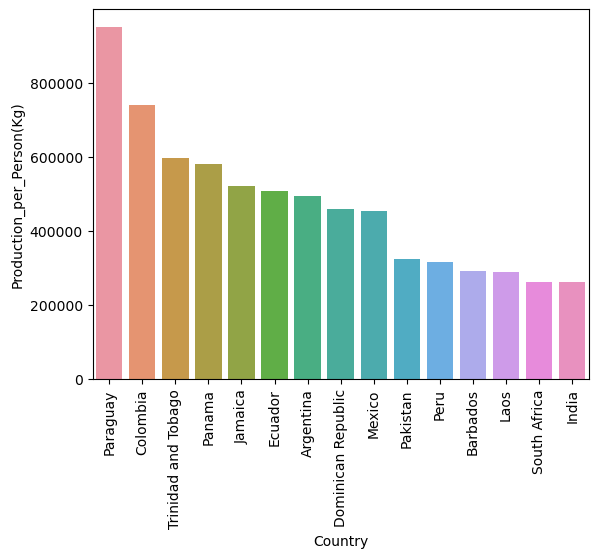

In [392]:
ax_pd = df.sort_values('Production_per_Person(Kg)', ascending = False).head(15)
ax = sns.barplot( data = ax_pd , x = 'Country' , y = 'Production_per_Person(Kg)')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90 )
plt.show()

## Correlation

In [409]:
df.iloc[:,2:6].corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.016341,0.997550,0.132812
Production_per_Person(Kg),0.016341,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

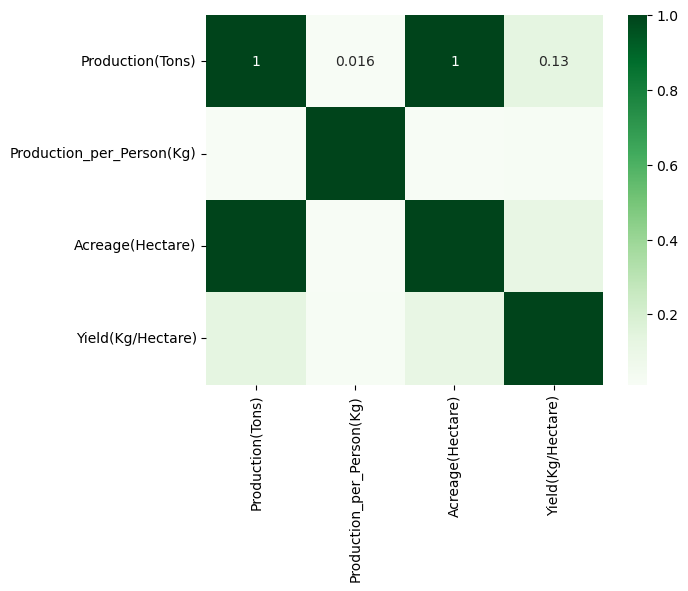

In [419]:
sns.heatmap(df.iloc[:,2:6].corr() , annot = True , cmap = 'Greens')

### Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

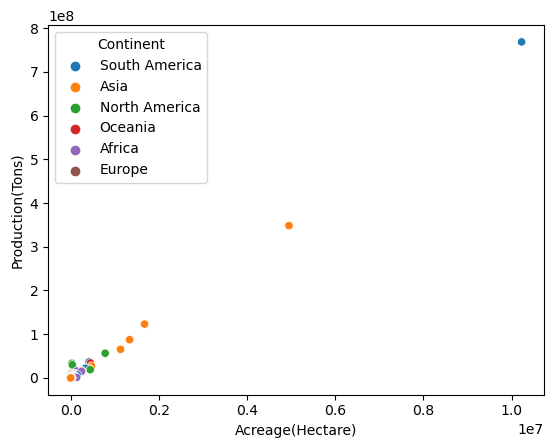

In [431]:
sns.scatterplot(data =  df  , x ='Acreage(Hectare)' , y = 'Production(Tons)' , hue = 'Continent' )

### Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

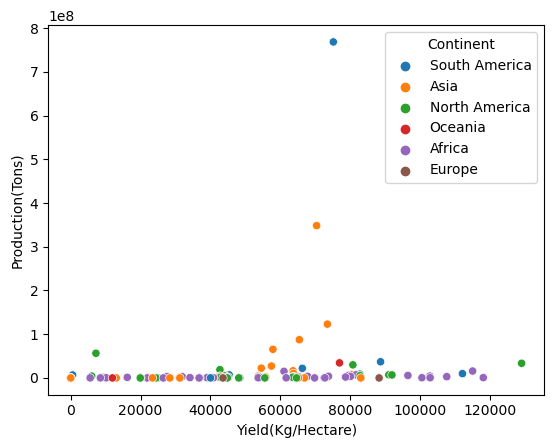

In [436]:
sns.scatterplot(data =  df  , x ='Yield(Kg/Hectare)' , y = 'Production(Tons)' , hue = 'Continent' )

## Analysis for Continent

In [438]:
df.head(5)

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [450]:
df_continent = df.groupby('Continent').sum()

In [454]:
df_continent['number_of_Country'] = df.groupby('Continent').count()['Country']
df_continent

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_Country
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681525.0,2332687.293,1439089.0,2142107.5,39
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


### Which continent produces maximum sugarcane?


<Axes: xlabel='Continent'>

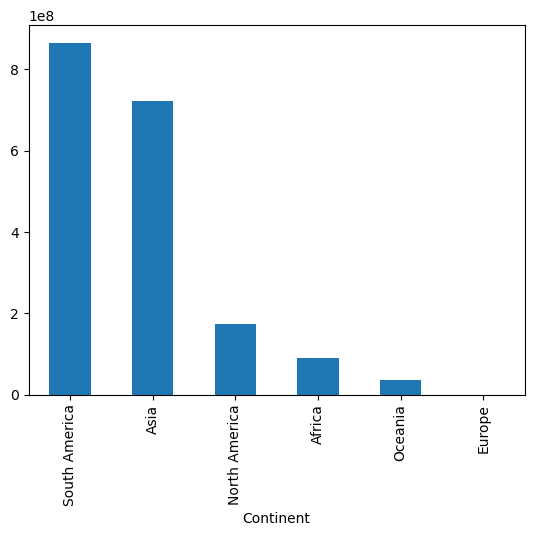

In [470]:
df_continent['Production(Tons)'].sort_values(ascending = False).plot(kind = 'bar')

### Do numnber of countries in a Continents effects production of sugarcane?

C:\Users\ShyamKumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ShyamKumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


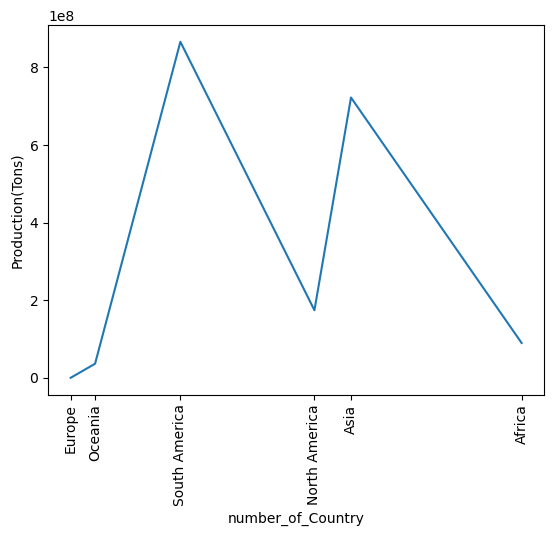

In [478]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent,x = "number_of_Country", y= "Production(Tons)" )
plt.xticks(df_continent["number_of_Country"], continent_names, rotation =90)
plt.show()

### Do continent with highest land produces more sugarcane?

C:\Users\ShyamKumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ShyamKumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

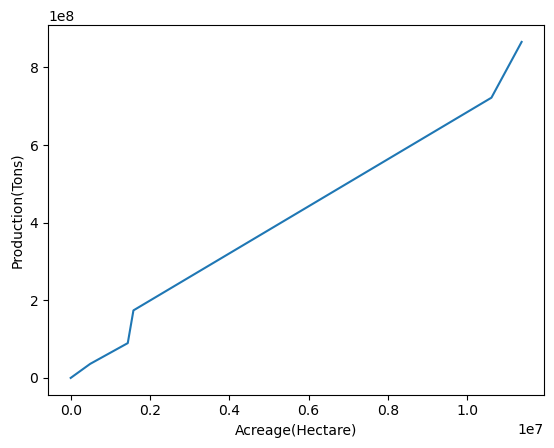

In [496]:
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)" )

### Production distribution by continent

<Axes: ylabel='Production(Tons)'>

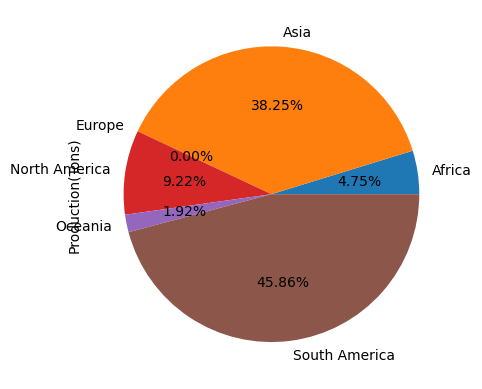

In [490]:
df_continent['Production(Tons)'].plot( kind = 'pie' , autopct = "%.2f%%")

### Correlation for continent

In [494]:
df_continent.iloc[:,2:7].corr()

,Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_Country
Production_per_Person(Kg),1.000000,0.463211,0.542971,0.531984
Acreage(Hectare),0.463211,1.000000,0.111166,0.122407
Yield(Kg/Hectare),0.542971,0.111166,1.000000,0.991746
number_of_Country,0.531984,0.122407,0.991746,1.000000
